# RO47019: Intelligent Control Systems Practical Assignment
* Period: 2023-2024, Q3
* Course homepage: https://brightspace.tudelft.nl/d2l/home/500969
* Instructor: Cosimo Della Santina (C.DellaSantina@tudelft.nl)
* Teaching assistant: Maria de Neves de Fonseca (M.deNevesdeFonseca-1@student.tudelft.nl)
* (c) TU Delft, 2024

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Remove `raise NotImplementedError()` afterwards. Moreover, if you see an empty cell, please DO NOT delete it, instead run that cell as you would run all other cells. Please fill in your name(s) and other required details below:

In [1]:
# Please fill in your names, student numbers, netID, and emails below.
STUDENT_1_NAME = "timothy van den Heuvel"
STUDENT_1_STUDENT_NUMBER = "5606403"
STUDENT_1_NETID = "timvandenheuve"
STUDENT_1_EMAIL = "t.j.vandenheuvel-1@student.tudelft.nl"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert STUDENT_1_NAME != ""
assert STUDENT_1_STUDENT_NUMBER != ""
assert STUDENT_1_NETID != ""
assert STUDENT_1_EMAIL != ""

### General announcements

* Do *not* share your solutions (also after the course is finished), and do *not* copy solutions from others. By submitting your solutions, you claim that you alone are responsible for this code.

* Do *not* email questions directly, since we want to provide everybody with the same information and avoid repeating the same answers. Instead, please post your questions regarding this assignment in the correct support forum on Brightspace, this way everybody can benefit from the response. If you do have a particular question that you want to ask directly, please use the scheduled Q&A hours to ask the TA.

* There is a strict deadline for each assignment. Students are responsible to ensure that they have uploaded their work in time. So, please double check that your upload succeeded to the Brightspace and avoid any late penalties.

* This [Jupyter notebook](https://jupyter.org/) uses `nbgrader` to help us with automated tests. `nbgrader` will make various cells in this notebook "uneditable" or "unremovable" and gives them a special id in the cell metadata. This way, when we run our checks, the system will check the existence of the cell ids and verify the number of points and which checks must be run. While there are ways that you can edit the metadata and work around the restrictions to delete or modify these special cells, you should not do that since then our nbgrader backend will not be able to parse your notebook and give you points for the assignment. You are free to add additional cells, but if you find a cell that you cannot modify or remove, please know that this is on purpose.

* This notebook will have in various places a line that throws a `NotImplementedError` exception. These are locations where the assignment requires you to adapt the code! These lines are just there as a reminder for you that you have not yet adapted that particular piece of code, especially when you execute all the cells. Once your solution code replaced these lines, it should accordingly *not* throw any exceptions anymore.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

# Task 1a - Extract the datasets (0p)

**Authors:** Chuhan Zhang (C.Zhang-8@tudelft.nl), Tomás Coleman


## Task 1a.1 - Extracting the dataset from the provided ZIP archive

To train the model, we require data. Therefore, we generate images of the robot at various positions in its state space. 
At every position chosen in the state space, an RGB image with dimensions `500x500x3` is generated as observation data $x$ together with the corresponding robot configuration $s=\theta$, where $\theta$ is the link angle of the robot. 
The angle $\theta$ is in radians and ranges from $[-\pi, \pi]$. When the pendulum is pointing straight up, it is 0. A positive angle corresponds to a right-handed rotation around the z-axis (i.e., counter-clockwise).

In this task, we use the OpenAI Gym environment to generate the image of a single pendulum with its corresponding angle. This dataset is already generated and provided in the zip archive `source/problem_1/datasets/pendulum_dataset.zip`. Therefore, you do not need any knowledge about OpenAI Gym. During the dataset generation process, we sampled the pendulum position with an interval of 0.1 degrees and then rendered the pendulum at the given configuration. Therefore, we generated a total of 3,600 samples of data, equally covering the robot's configuration space.

Run the cells below to generate the dataset needed for the problems in Task 1b.

**This notebook is not graded, but running the code in this notebook is required for all subsequent tasks in problem 1.**

**Please do __not__ include the datasets of Problem 1 in your final submission!**, i.e., exclude the `source/problem_1/datasets` folder from your ZIP archive.

In [3]:
# import the necessary dependencies
import imageio
from IPython.display import display, Image
import numpy as np
from os import PathLike
from pathlib import Path
from typing import List

The data is already generated and you don't need to learn anything about OpenAI Gym environment. First of all, we will unzip the dataset folder:

In [4]:
from shutil import rmtree
from zipfile import ZipFile

datasets_folder = Path("datasets")
# specify the path to the pendulum dataset folder
dataset_path = Path("datasets") / "pendulum_dataset"

# remove datasets/pendulum_dataset folder if it already exists
if dataset_path.exists():
    rmtree(dataset_path)

# unzip the dataset into datatsets/pendulum_datasets
with ZipFile(datasets_folder / "pendulum_dataset.zip", "r") as zip:
    # extracting all the files
    print("Extracting the pendulum dataset files now...")
    zip.printdir()
    zip.extractall(path=datasets_folder)
    print("Done!")

Extracting the pendulum dataset files now...
File Name                                             Modified             Size
pendulum_dataset/                              2023-12-12 16:44:32            0
pendulum_dataset/image1245.npz                 2023-12-12 16:44:20       750264
pendulum_dataset/image2038.npz                 2023-12-12 16:44:24       750264
pendulum_dataset/image1693.npz                 2023-12-12 16:44:24       750264
pendulum_dataset/label323.npz                  2023-12-12 16:44:16          272
pendulum_dataset/label1668.npz                 2023-12-12 16:44:24          272
pendulum_dataset/label2086.npz                 2023-12-12 16:44:26          272
pendulum_dataset/image1499.npz                 2023-12-12 16:44:22       750264
pendulum_dataset/image1299.npz                 2023-12-12 16:44:22       750264
pendulum_dataset/image113.npz                  2023-12-12 16:44:16       750264
pendulum_dataset/label486.npz                  2023-12-12 16:44:18         

A folder called `pendulum_dataset` should be in the `datasets` directory. Please do NOT submit this `datasets` folder with your answers! In the `datasets/pendulum_dataset` folder, the image data is saved in the format of `image{number}.npz,` with serial numbers from 0 to 3,599. The `label{number}.npz` files also contain position information in the same order as the image data. In the following section, we call it label data.

## Task 1a.2 - Visualizing the dataset

We also provide the code for generating a GIF to visualize the data distribution. This visualization program samples every 100 images and generates a GIF. At the end, you should get a dynamic picture in which the pendulum is rotating uniformly in a two-dimensional plane around its central axis.

We prepared some helper methods to visualize the dataset. We want to sample 36 images in an average way in the dataset to show the movement trend of the pendulum. The method `load_img` reads the image data from the dataset, and the method `create_gif` will create a gif animation to show the data.

In [5]:
# Function to read the images
def load_img(path: PathLike) -> List[np.ndarray]:
    """
    Load the generated images from the given dataset path.

    Args:
        path: Path to the dataset containing the images.
    Returns:
        images: A list of numpy arrays, each representing an image.
    """
    images = []
    i = 0
    while (Path(path) / f"image{i}.npz").exists():
        img = np.load(Path(path) / f"image{i}.npz")["arr_0"]
        images.append(img)
        i += 100
    return images


# Function to create a GIF from images
def create_gif(
    images: List[np.ndarray], filepath: PathLike, fps: float = 500.0
) -> None:
    """
    Create a GIF from a list of images.

    Args:
        images: A list of images, each as a numpy array.
        filepath: The filepath where the GIF should be saved.
        fps: The number of frames per second in the GIF.
    Returns:
    """
    with imageio.get_writer(filepath, mode="I", fps=fps, loop=0) as writer:
        for img in images:
            writer.append_data(np.uint8(img))

We load the saved gif and display it here.

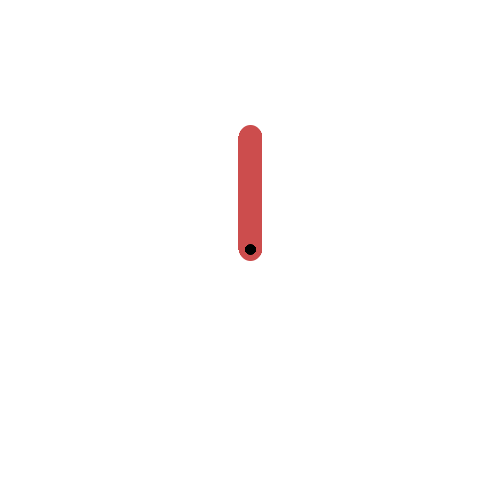

In [6]:
# specify the path to the GIF file with the dataset animation
gif_path = Path("datasets") / "pendulum_dataset.gif"

# create the gif
create_gif(load_img(dataset_path), gif_path)

# display the gif
display(Image(filename=gif_path))